# Homework 1

In this assignment, we will be exploring the car dataset and analyzing their fuel efficiency. <br >
Specifically, we will do some exploratory analysis with visualizations, then we will build a model for Simple Linear Regression, a model for Polynomial Regression, and one model for Logistic Regression. <br >
**The given dataset is already modified and cleaned**, but you can find [the original information here.](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

## Dataset Attribute Information

1. **mpg**: Miles per gallon. This is one primary measurement for car fuel efficiency.
2. **displacement** : The cylinder volumes in cubic inches.
3. **horsepower** : Engine power.
4. **weight** : In pounds.
5. **acceleration** : The elapsed time in seconds to go from 0 to 60mph.
6. **origin** : Region of origin.

### Libraries that can be used: numpy, pandas, scikit-learn, seaborn, plotly, matplotlib
Any libraries used in the discussion materials are also allowed.

#### Other Notes
 - Don't worry about not being able to achieve high accuracy, it is neither the goal nor the grading standard of **this** assignment. <br >
 - If not specified, you are not required to do hyperparameter tuning, but feel free to do so if you'd like.
 - Discussion materials should be helpful for doing the assignments.

# Exercises
## Exercise 1 - Exploratory Analysis (20 points in total)

### Exercise 1.1 - Correlation Matrix (10 points)
Generate a Pearson [correlation matrix plot](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07) in the form of a heatmap. See the link to have an idea about what this visualization should look like. <br >
After generating the plot, answer the following question: <br >
**If we are going to predict ``mpg`` in Simple Linear Regression(i.e., $y=ax+b$), which attribute are you most UNLIKELY to pick as the independent variable? Explain why.**

Requirements & notes
 - When computing correlation, make sure to drop the column ``origin`` to avoid errors.
 - The computed correlation values should be shown on the plot.
 - Use a diverging color scale with the color range being \[-1, 1\] and center being 0 (if applicable).

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

from IPython.display import display

from sklearn.svm import OneClassSVM
from numpy import where

<AxesSubplot:>

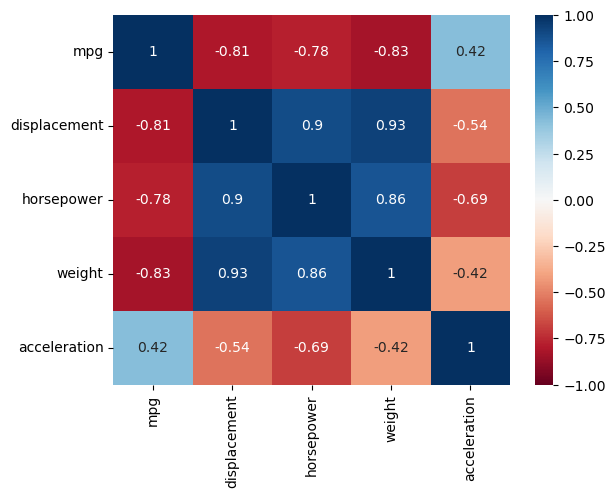

In [2]:
df = pd.read_csv('auto-mpg.csv')
df_copy = df.drop(columns=["origin"])
sns.heatmap(df_copy.corr(), vmin=-1, vmax=1, center= 0 ,annot = True, cmap= 'RdBu')

### Exercise 1.2 - Pairplot (10 points)
Generate a pairplot(a.k.a. scatter plot matrix) of the given dataset. <br >
After generating the plot, answer the following question: <br >
**If we are using ``horsepower`` to predict ``mpg``, which method could lead to the best performance? (Linear Regression, Polynomial Regression, or Logistic Regression) Explain why.**

Note that there is no requirement on the diagonals. You can leave empty or use other representations based on your preference. However, having ``origin``-based grouped data distributions on the diagonals effectively helps you answer some questions in the later exercises.   

Requirements
 - The points should be colored based on the column ``origin``.

In [3]:
fig = ff.create_scatterplotmatrix(df, diag='histogram', index='origin', height=1200, width=1200)
fig.show()

## Exercise 2 - Linear and Polynomial Regression (30 points in total)

### Exercise 2.1 - Splitting Dataset (5 points)
Split the data into training and testing set with the ratio of 80:20.

In [4]:
train, test = train_test_split(df, test_size=0.2, random_state=21)
X_train, y_train = train.drop(columns=['origin','mpg']), train['mpg']
X_test, y_test = test.drop(columns=['origin','mpg']), test['mpg']

### Exercise 2.2 - Simple Linear Regression (10 points)
Using one of the other attributes(excluding ``origin``) by your choice, please build a simple linear regression model that predicts ``mpg``. <br >

Requirements
 - Report the testing MSE error.

In [5]:
X_train, X_test = X_train["horsepower"], X_test["horsepower"]

lr = LinearRegression()

lr.fit(np.asarray(X_train).reshape(-1, 1), np.asarray(y_train).reshape(-1, 1))

predicted = lr.predict(np.asarray(X_test).reshape(-1, 1))

mean_squared_error(predicted, np.asarray(y_test).reshape(-1, 1))

23.204866253985475

### Exercise 2.3 - Polynomial Regression (15 points)
Build polynomial regression models that predict ``mpg`` with the same choice in 2.2. <br >
Specifically, from degree=2 to degree=4, build one respectively. <br >
Then, based on the reported errors from only these three degrees, **do you think there is a sign of overfitting? Provide your reasoning.**


Requirements
 - Report the training MSE error for each of the three degrees.
 - Report the testing MSE error for each of the three degrees.


In [6]:
for degree in [2, 3, 4]:
    poly = PolynomialFeatures(degree, include_bias=False)
    X_poly = poly.fit_transform(np.asarray(X_train).reshape(-1, 1))
    plr = LinearRegression()

    plr.fit(X_poly, np.asarray(y_train).reshape(-1, 1))

    predicted = plr.predict(poly.transform(np.asarray(X_test).reshape(-1, 1)))

    y_train_pred = plr.predict(X_poly)
    train_mse = mean_squared_error(y_train, y_train_pred)
    print(f"Degree {degree} - Training set MSE: {train_mse:.2f}")

    X_test_poly = poly.transform(np.asarray(X_test).reshape(-1, 1))
    y_test_pred = plr.predict(X_test_poly)
    test_mse = mean_squared_error(y_test, y_test_pred)
    print(f"Degree {degree} - Testing set MSE: {test_mse:.2f}")

Degree 2 - Training set MSE: 19.51
Degree 2 - Testing set MSE: 16.91
Degree 3 - Training set MSE: 19.45
Degree 3 - Testing set MSE: 16.99
Degree 4 - Training set MSE: 19.34
Degree 4 - Testing set MSE: 17.10


Looking at how well the model learned, it doesn't seem like it's trying too hard to fit the training data. We can tell this because when we compare the mistakes it makes on new data to the mistakes it makes on the data it learned from, it's not much worse for all three cases. So, there's no sign of overfitting here.

## Exercise 3 - Overfitting and Underfitting (25 points in total)
The fitting dataset contains the actual train and test data spread for a model along with three rotations of the same. The dataset is provided in the Canvas file.

### Exercise 3.1 - sse and variance
Calculate the sse and variance for the three predictions based on the actual data.<br >
Show the calculation for the above metrics.<br >
Highlight the values you get for all three predictions and the actual data. 

In [7]:
data = pd.read_csv('fitting.csv')

y_train = data["Training Data"]
y_test = data["Test Data"]

pred_train = [data[f"Prediction {i} Training"] for i in range(1, 4)]
pred_test = [data[f"Prediction {i} Test"] for i in range(1, 4)]

for i in range(3):
    sse_train = np.sum((pred_train[i] - y_train) ** 2)
    sse_test = np.sum((pred_test[i] - y_test) ** 2)
    
    var_train = np.var(pred_train[i] - y_train)
    var_test = np.var(pred_test[i] - y_test)
    
    print(f"Model {i+1}:")
    print(f"\tTraining SSE:      {sse_train:.2f}")
    print(f"\tTest SSE:          {sse_test:.2f}")
    print(f"\tTraining Variance: {var_train:.2f}")
    print(f"\tTest Variance:     {var_test:.2f}")


Model 1:
	Training SSE:      12.29
	Test SSE:          6.34
	Training Variance: 0.25
	Test Variance:     0.98
Model 2:
	Training SSE:      12.34
	Test SSE:          2.13
	Training Variance: 0.24
	Test Variance:     0.40
Model 3:
	Training SSE:      19.17
	Test SSE:          13.43
	Training Variance: 0.48
	Test Variance:     1.49


### Excercise 3.2 - Justification
Based on the values calculated above classify the predictions into three categories base prediction, overfitting prediction, underfitting prediction. Also provide appropriate justifications for the classifications. 

Base Prediction: Lets take a look at the second prediction. The SSE values for these are quite low when you compare them to the others. This hints that these models are doing a decent job fitting the data. Plus, the variance values aren't too wild, indicating they're not trying too hard to fit the data they already know. They strike a good balance.

Overfitting Prediction: Now lets look at the third prediction. The SSE values are notably high when you look at them compared to the rest. This suggests that these models struggle to fit the data properly. On top of that, the variance values are quite elevated, hinting that they're overcomplicating things by fitting the data too closely. This could mean they won't perform well with new data.

Underfitting Prediction: Lastly, lets look at the first prediction. The SSE values are higher compared to the others, signaling they don't fit the data well. However, the variance values are on the low side, which implies they're too simple and aren't picking up on all the details in the relationship between the features and the target variable. It's like they miss the bigger picture.

## Exercise 4 - Outliers (25 points in total)
Now we are going to perform outlier detection using the diabetes dataset. 
The dataset is provided in the Canvas file.

### Exercise 4.1 - box plot
Extract the 'BloodPressure' attribute from the diabetes dataset.<br >
Create a box plot with the 'BloodPressure' attribute.<br >
Highlight the outliers in the box plot with special colors.

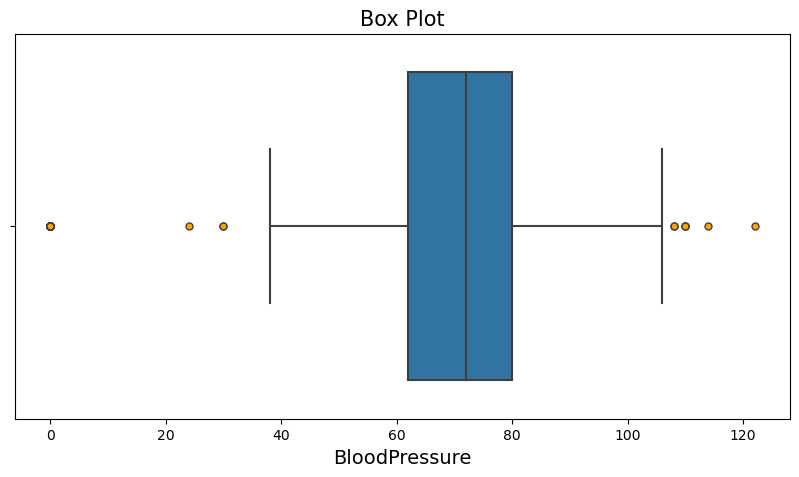

In [16]:
df = pd.read_csv('diabetes.csv')

fig = plt.figure(figsize=(10,5))
sns.boxplot(x = df.BloodPressure, flierprops = dict(markerfacecolor = 'orange', marker = 'o'))
plt.title('Box Plot', fontsize=15)
plt.xlabel('BloodPressure', fontsize=14)
plt.show()

### Exercise 4.2 - anomaly detection
Extract features 'BMI' and 'Insulin' from the diabetes dataset.<br >
Implement anomaly detection using the One-Class SVM algorithm.<br >
Plot a scatter plot similar to Lecture 2 Slide 11, annotating the outlier data points.

Text(0, 0.5, 'Insulin')

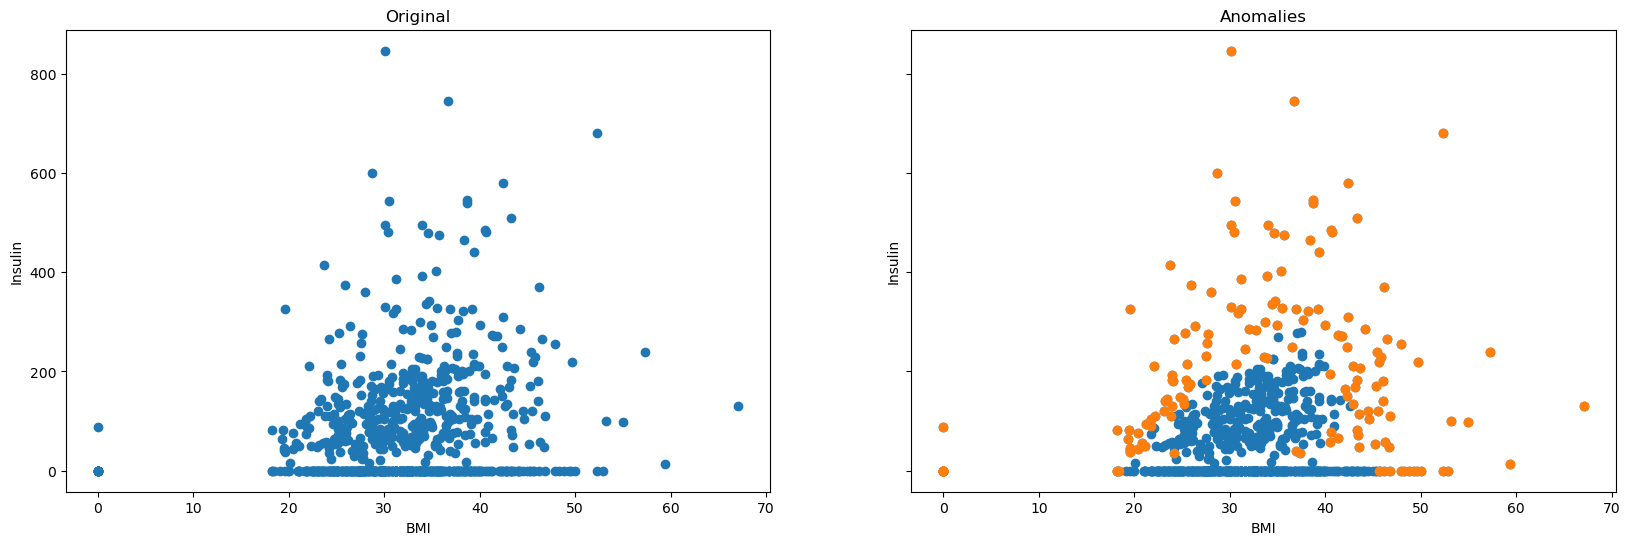

In [17]:
Data = df[["BMI", "Insulin"]]

input = Data.to_numpy()


svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.2)

svm.fit(input)

pred = svm.predict(input)

anom_index = where(pred==-1)
values = input[anom_index]

fig, (ax0, ax1)=plt.subplots(1,2, sharey=True, figsize=(20,6))

# Ground truth
ax0.set_title('Original')
ax0.scatter(Data["BMI"], Data["Insulin"])
ax0.set_xlabel("BMI")
ax0.set_ylabel("Insulin")

ax1.set_title('Anomalies')
ax1.scatter(input[:,0], input[:,1])
ax1.scatter(values[:,0], values[:,1])
ax1.set_xlabel("BMI")
ax1.set_ylabel("Insulin")